# Notebook for Data presentations

### Load and Config Packages

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm  

#%matplotlib qt

## Group Structure

Group data needed for post-processing:

In [39]:
R = np.array([[0, -1],[1, 0]])
M = np.array([[1, 0],[0, -1]])
G = np.zeros([2,2,8])
G[:,:,0] = np.eye(2) # The D_4 group [via it's faithful 2d rep]
G[:,:,1] = R
G[:,:,2] = R@R
G[:,:,3] = R@R@R
G[:,:,4] = M
G[:,:,5] = M@R
G[:,:,6] = M@R@R
G[:,:,7] = M@R@R@R
g_lab = ['$e$','$r$','$r^2$','$r^3$','$m$','$mr$','$mr^2$','$mr^3$']
order = len(g_lab)
# Binary encoding: | M, R, RR> -> 8 element encoding needs to be translated in this formalism
encode = {'000':0,'010':1, '001':2, '011':3, '100':4,'110':5, '101':6, '111':7}

C_e = np.array([0])  # Conj Classes
C_r = np.array([1,3])
C_rr = np.array([2])
C_m = np.array([4,6])
C_mr = np.array([5,7])

Z_e = np.array([0, 1, 2, 3, 4, 5, 6, 7])  # Centers Classes
Z_r = np.array([0, 1, 2, 3])
Z_rr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
Z_m = np.array([0, 2, 4, 6])
Z_mr = np.array([0, 2, 5, 7])

Function to query the group structure:

In [40]:
def dag(M):
    return np.conjugate(M.T)
def matInv(M):
    return np.linalg.inv(M)
def is_eq(A,B):
    return np.array_equal(A,B)

def q(c):
    Q_C = [0, 0, 0, 4, 0, 0, 3, 3] # This for q_c instead : Coset Representatives
    return Q_C[c]

def grp(x):
    return G[:,:,x] # USE G AS A GLOBAL VAR!!! ---- CAREFUL !


def grp_i(i):
    return matInv(G[:,:,i])

def index(h):
    for i in range(8): # to be generalised
        if np.array_equal(h, G[:,:,i]):
            return i

def inv(x):
    for i in range(8): # to be generalised
        if np.array_equal(matInv(G[:,:,x]), G[:,:,i]):
            return i

## Data Analysis

In [41]:
# Fusion on the Glasses

# H_m:
results_m = [[486,  62, 499,  82,  77,  10,  85,   4],
 [ 61,   6,  62,  10,  21,   3,  13,   1],
 [ 24,   7,  25,   3,  31,   2,  26,   3],
 [  4,   0,   2,   3,   2,   0,   2,   0]]

# H_mr:
results_mr = [[279,  49, 234,  45,  56,  13,  64,  10],
 [ 38,   7,  26,   8,  10,   4,  8,   6],
 [278,  54, 250,  38,  67,  12,  58,  14],
 [ 36,   7,  28,   5,   9,   0,   8,   0]]

# H_r:
results_r = [[298,  93, 305,  91,  59,  24,  61,  26],
 [ 72,  21,  72,  21,  14,   7,  18,  12],
 [295,  98, 262,  86,  60,  19,  62,  29],
 [ 68,  36,  63,  18,  19,   8,  14,   9]]


1616
[[486  62 499  82  77  10  85   4]
 [ 61   6  62  10  21   3  13   1]
 [ 24   7  25   3  31   2  26   3]
 [  4   0   2   3   2   0   2   0]]


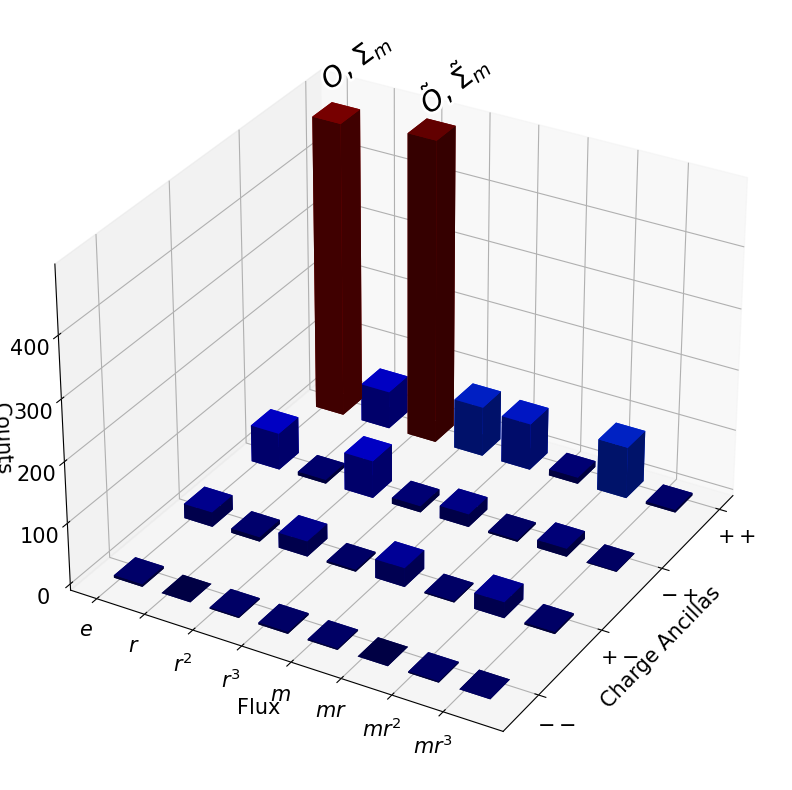

In [42]:
results = np.array(results_m)
# results = results.T # for some runs, not all
print(results.sum().sum())
print(results)
results.size
results = (results).reshape([results.size])

charge_mmt_res = ['$+ +$','$- +$','$+ -$','$- -$']
charge_mmt_res_num = [0, 1, 2, 3]
g_lab_num = [0,1,2,3,4,5,6,7]
mindex_num = list(itertools.product(charge_mmt_res_num, g_lab_num))
mindex = list(itertools.product(charge_mmt_res, g_lab))
index = pd.MultiIndex.from_tuples(mindex, names=['charge ancillas', 'flux'])
df = pd.DataFrame({'Counts':results}, index= index)

x = [list(t) for t in zip(*mindex_num)][0]
y = [list(t) for t in zip(*mindex_num)][1]
x_lab = [list(t) for t in zip(*mindex)][0]
y_lab = [list(t) for t in zip(*mindex)][1]
z = results
bottom = np.zeros_like(z)
width = 0.3
depth = width*2

a = lambda i: charge_mmt_res[i]

# setup the figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d')

plt.rc('font', size=15) 

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z]

ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)
#surf = ax1.plot_surface(np.array(x).reshape(4,8), np.array(y).reshape(4,8), z.reshape(4,8), cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel('Charge Ancillas')
ax1.set_ylabel('Flux')
ax1.set_zlabel('Counts')

ax1.set_xticks(charge_mmt_res_num)
ax1.set_xticklabels(charge_mmt_res)
ax1.set_yticks(g_lab_num)
ax1.set_yticklabels(g_lab)

import matplotlib.patheffects as pe
ax1.text(0,-1/3,500, r'$O$, $\Sigma_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(0,2-1/3,500, r'$\tilde{O}$, $\tilde{\Sigma}_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax1.view_init(elev=30, azim=30)
plt.savefig('glasses_m.png', dpi=300)
plt.show()

1721
[[279  49 234  45  56  13  64  10]
 [ 38   7  26   8  10   4   8   6]
 [278  54 250  38  67  12  58  14]
 [ 36   7  28   5   9   0   8   0]]


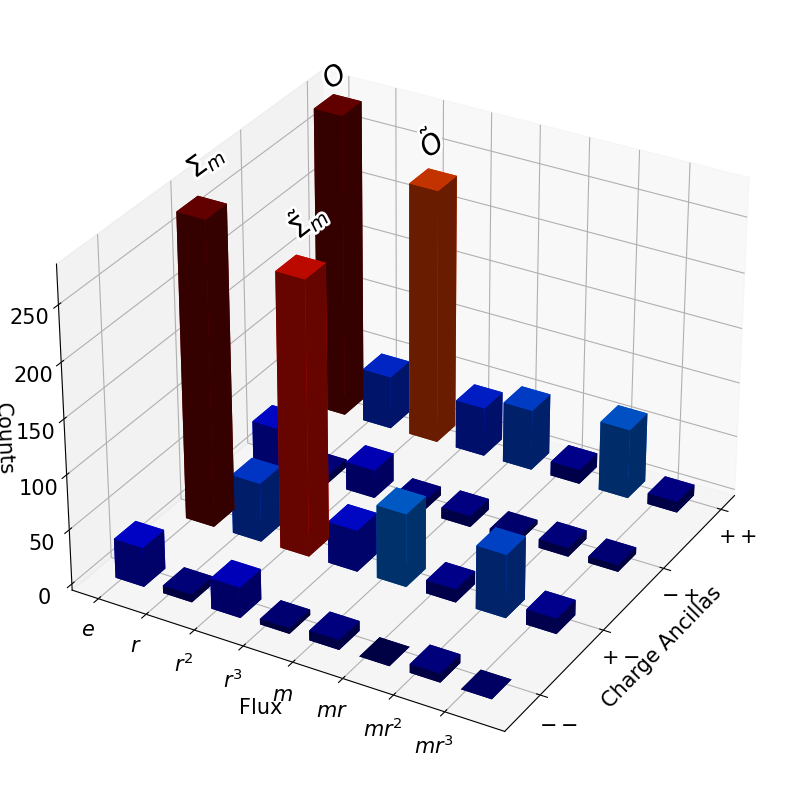

In [43]:
results = np.array(results_mr)
# results = results.T # for some runs, not all
print(results.sum().sum())
print(results)
results.size
results = (results).reshape([results.size])

charge_mmt_res = ['$+ +$','$- +$','$+ -$','$- -$']
charge_mmt_res_num = [0, 1, 2, 3]
g_lab_num = [0,1,2,3,4,5,6,7]
mindex_num = list(itertools.product(charge_mmt_res_num, g_lab_num))
mindex = list(itertools.product(charge_mmt_res, g_lab))
index = pd.MultiIndex.from_tuples(mindex, names=['charge ancillas', 'flux'])
df = pd.DataFrame({'Counts':results}, index= index)

x = [list(t) for t in zip(*mindex_num)][0]
y = [list(t) for t in zip(*mindex_num)][1]
x_lab = [list(t) for t in zip(*mindex)][0]
y_lab = [list(t) for t in zip(*mindex)][1]
z = results
bottom = np.zeros_like(z)
width = 0.3
depth = width*2

a = lambda i: charge_mmt_res[i]

# setup the figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d')

plt.rc('font', size=15) 

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z]

ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)
#surf = ax1.plot_surface(np.array(x).reshape(4,8), np.array(y).reshape(4,8), z.reshape(4,8), cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel('Charge Ancillas')
ax1.set_ylabel('Flux')
ax1.set_zlabel('Counts')

ax1.set_xticks(charge_mmt_res_num)
ax1.set_xticklabels(charge_mmt_res)
ax1.set_yticks(g_lab_num)
ax1.set_yticklabels(g_lab)

import matplotlib.patheffects as pe
ax1.text(0,-1/3,280, r'$O$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(0,2-1/3,240, r'$\tilde{O}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(2,-1/3,290, r'$\Sigma_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(2,2-1/3,260, r'$\tilde{\Sigma}_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax1.view_init(elev=30, azim=30)
plt.savefig('glasses_mr.png', dpi=300)
plt.show()

2340
[[298  93 305  91  59  24  61  26]
 [ 72  21  72  21  14   7  18  12]
 [295  98 262  86  60  19  62  29]
 [ 68  36  63  18  19   8  14   9]]


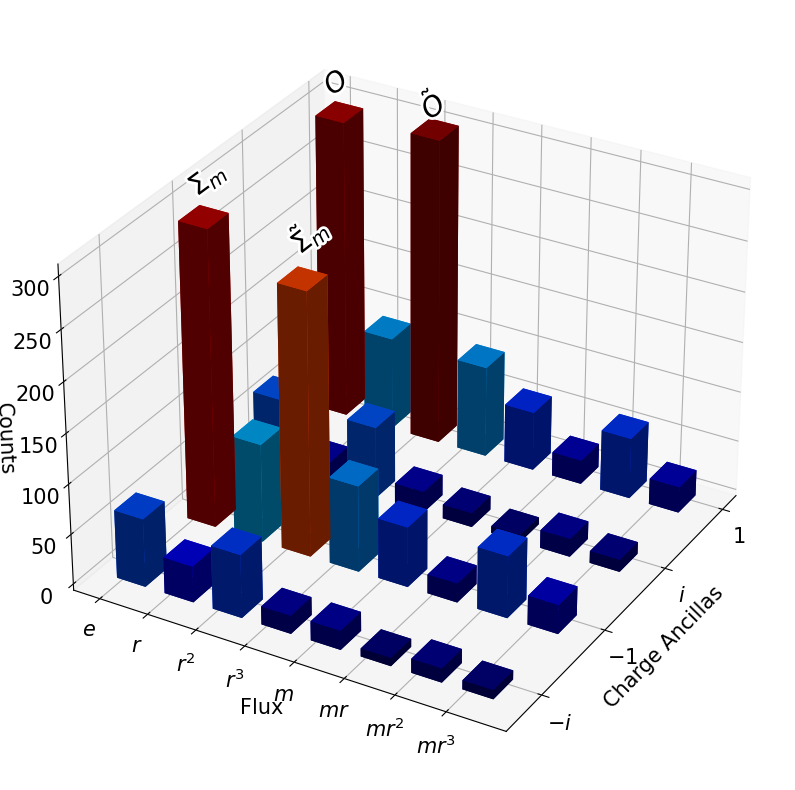

In [44]:
results = np.array(results_r)
# results = results.T # for some runs, not all
print(results.sum().sum())
print(results)
results.size
results = (results).reshape([results.size])

charge_mmt_res = ['$1$','$i$','$-1$','$-i$']
charge_mmt_res_num = [0, 1, 2, 3]
g_lab_num = [0,1,2,3,4,5,6,7]
mindex_num = list(itertools.product(charge_mmt_res_num, g_lab_num))
mindex = list(itertools.product(charge_mmt_res, g_lab))
index = pd.MultiIndex.from_tuples(mindex, names=['charge ancillas', 'flux'])
df = pd.DataFrame({'Counts':results}, index= index)

x = [list(t) for t in zip(*mindex_num)][0]
y = [list(t) for t in zip(*mindex_num)][1]
x_lab = [list(t) for t in zip(*mindex)][0]
y_lab = [list(t) for t in zip(*mindex)][1]
z = results
bottom = np.zeros_like(z)
width = 0.3
depth = width*2

a = lambda i: charge_mmt_res[i]

# setup the figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d')

plt.rc('font', size=15) 

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z]

ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)
#surf = ax1.plot_surface(np.array(x).reshape(4,8), np.array(y).reshape(4,8), z.reshape(4,8), cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel('Charge Ancillas')
ax1.set_ylabel('Flux')
ax1.set_zlabel('Counts')

ax1.set_xticks(charge_mmt_res_num)
ax1.set_xticklabels(charge_mmt_res)
ax1.set_yticks(g_lab_num)
ax1.set_yticklabels(g_lab)

import matplotlib.patheffects as pe
ax1.text(0,-1/3,300, r'$O$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(0,2-1/3,300, r'$\tilde{O}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(2,-1/3,300, r'$\Sigma_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(2,2-1/3,270, r'$\tilde{\Sigma}_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax1.view_init(elev=30, azim=30)
plt.savefig('glasses_r.png', dpi=300)
plt.show()

## Data Analysis

In [45]:
# Fusion on the Basket

# H_m:
results_m = [[856, 193, 230,  53],
 [239,  88, 105,  35],
 [812, 176, 218,  65],
 [243,  64, 116,  36],
 [393,  87, 137,  33],
 [148,  29,  61,  23],
 [398,  86, 158,  34],
 [106,  44,  55,  22]]

# H_mr:
results_mr = [[545, 148, 474, 119],
 [215,  68, 222,  51],
 [514, 157, 448, 126],
 [197,  69, 211,  60],
 [222,  43, 197,  54],
 [118,  26, 128,  28],
 [242,  72, 198,  60],
 [110,  44,  93,  30]]


# H_r:
results_r = [[298,  93, 305,  91,  59,  24,  61,  26],
 [ 72,  21,  72,  21,  14,   7,  18,  12],
 [295,  98, 262,  86,  60,  19,  62,  29],
 [ 68,  36,  63,  18,  19,   8,  14,   9]]


5343
[[856 239 812 243 393 148 398 106]
 [193  88 176  64  87  29  86  44]
 [230 105 218 116 137  61 158  55]
 [ 53  35  65  36  33  23  34  22]]


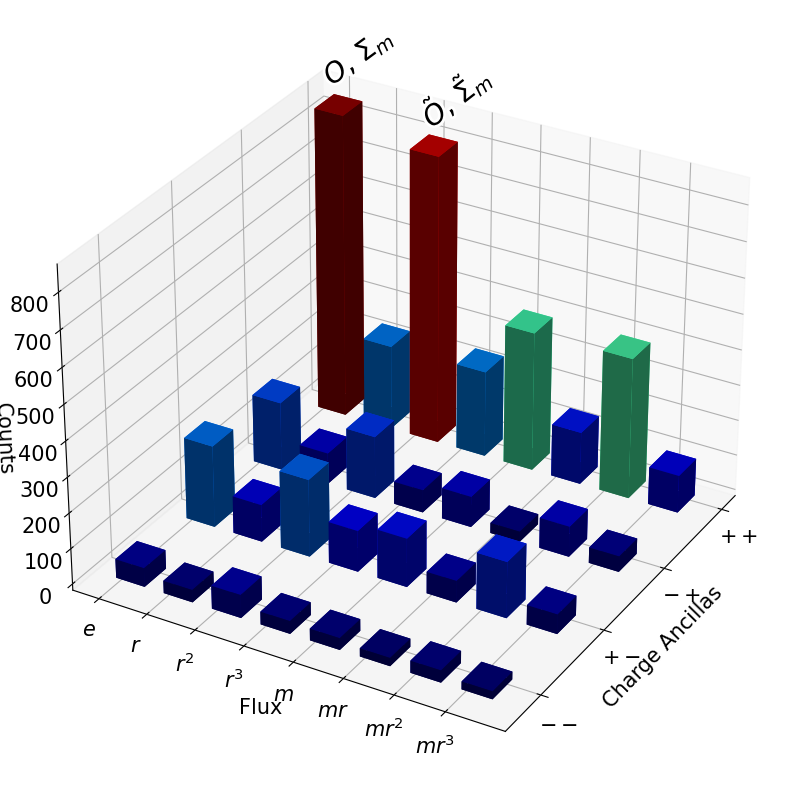

In [55]:
results = np.array(results_m)
results = results.T # for some runs, not all
print(results.sum().sum())
print(results)
results.size
results = (results).reshape([results.size])

charge_mmt_res = ['$+ +$','$- +$','$+ -$','$- -$']
charge_mmt_res_num = [0, 1, 2, 3]
g_lab_num = [0,1,2,3,4,5,6,7]
mindex_num = list(itertools.product(charge_mmt_res_num, g_lab_num))
mindex = list(itertools.product(charge_mmt_res, g_lab))
index = pd.MultiIndex.from_tuples(mindex, names=['charge ancillas', 'flux'])
df = pd.DataFrame({'Counts':results}, index= index)

x = [list(t) for t in zip(*mindex_num)][0]
y = [list(t) for t in zip(*mindex_num)][1]
x_lab = [list(t) for t in zip(*mindex)][0]
y_lab = [list(t) for t in zip(*mindex)][1]
z = results
bottom = np.zeros_like(z)
width = 0.3
depth = width*2

a = lambda i: charge_mmt_res[i]

# setup the figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d')

plt.rc('font', size=15) 

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z]

ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)
#surf = ax1.plot_surface(np.array(x).reshape(4,8), np.array(y).reshape(4,8), z.reshape(4,8), cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel('Charge Ancillas')
ax1.set_ylabel('Flux')
ax1.set_zlabel('Counts')

ax1.set_xticks(charge_mmt_res_num)
ax1.set_xticklabels(charge_mmt_res)
ax1.set_yticks(g_lab_num)
ax1.set_yticklabels(g_lab)

import matplotlib.patheffects as pe
ax1.text(0,-1/3,870, r'$O$, $\Sigma_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(0,2-1/3,820, r'$\tilde{O}$, $\tilde{\Sigma}_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax1.view_init(elev=30, azim=30)
plt.savefig('basket_m.png', dpi=300)
plt.show()

5289
[[545 215 514 197 222 118 242 110]
 [148  68 157  69  43  26  72  44]
 [474 222 448 211 197 128 198  93]
 [119  51 126  60  54  28  60  30]]


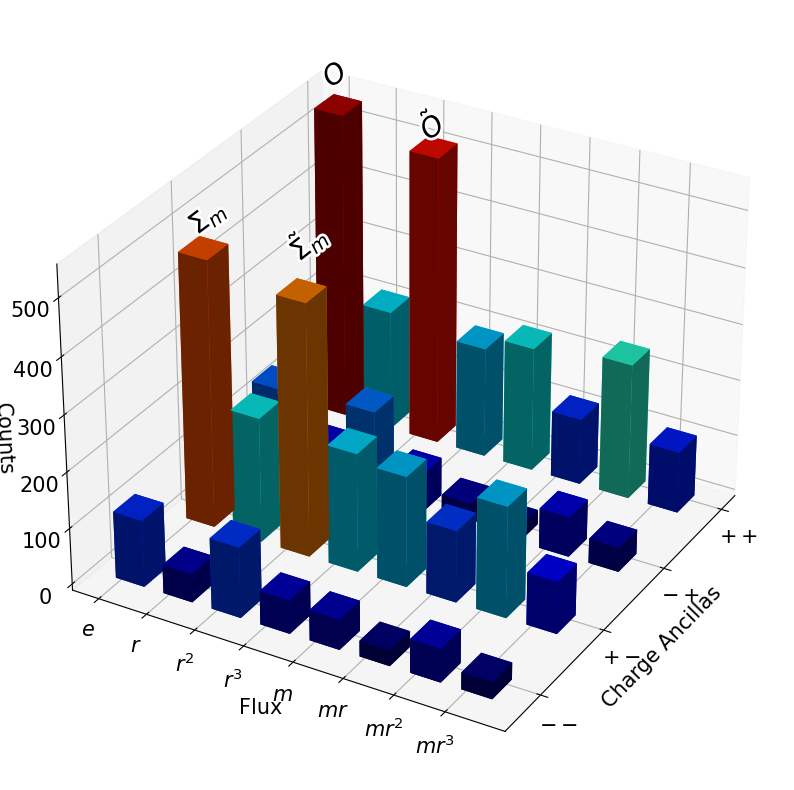

In [51]:
results = np.array(results_mr)
results = results.T # for some runs, not all
print(results.sum().sum())
print(results)
results.size
results = (results).reshape([results.size])

charge_mmt_res = ['$+ +$','$- +$','$+ -$','$- -$']
charge_mmt_res_num = [0, 1, 2, 3]
g_lab_num = [0,1,2,3,4,5,6,7]
mindex_num = list(itertools.product(charge_mmt_res_num, g_lab_num))
mindex = list(itertools.product(charge_mmt_res, g_lab))
index = pd.MultiIndex.from_tuples(mindex, names=['charge ancillas', 'flux'])
df = pd.DataFrame({'Counts':results}, index= index)

x = [list(t) for t in zip(*mindex_num)][0]
y = [list(t) for t in zip(*mindex_num)][1]
x_lab = [list(t) for t in zip(*mindex)][0]
y_lab = [list(t) for t in zip(*mindex)][1]
z = results
bottom = np.zeros_like(z)
width = 0.3
depth = width*2

a = lambda i: charge_mmt_res[i]

# setup the figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d')

plt.rc('font', size=15) 

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z]

ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)
#surf = ax1.plot_surface(np.array(x).reshape(4,8), np.array(y).reshape(4,8), z.reshape(4,8), cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel('Charge Ancillas')
ax1.set_ylabel('Flux')
ax1.set_zlabel('Counts')

ax1.set_xticks(charge_mmt_res_num)
ax1.set_xticklabels(charge_mmt_res)
ax1.set_yticks(g_lab_num)
ax1.set_yticklabels(g_lab)

import matplotlib.patheffects as pe
ax1.text(0,-1/3,550, r'$O$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(0,2-1/3,500, r'$\tilde{O}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(2,-1/3,470, r'$\Sigma_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(2,2-1/3,470, r'$\tilde{\Sigma}_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax1.view_init(elev=30, azim=30)
plt.savefig('basket_mr.png', dpi=300)
plt.show()

2340
[[298  72 295  68]
 [ 93  21  98  36]
 [305  72 262  63]
 [ 91  21  86  18]
 [ 59  14  60  19]
 [ 24   7  19   8]
 [ 61  18  62  14]
 [ 26  12  29   9]]


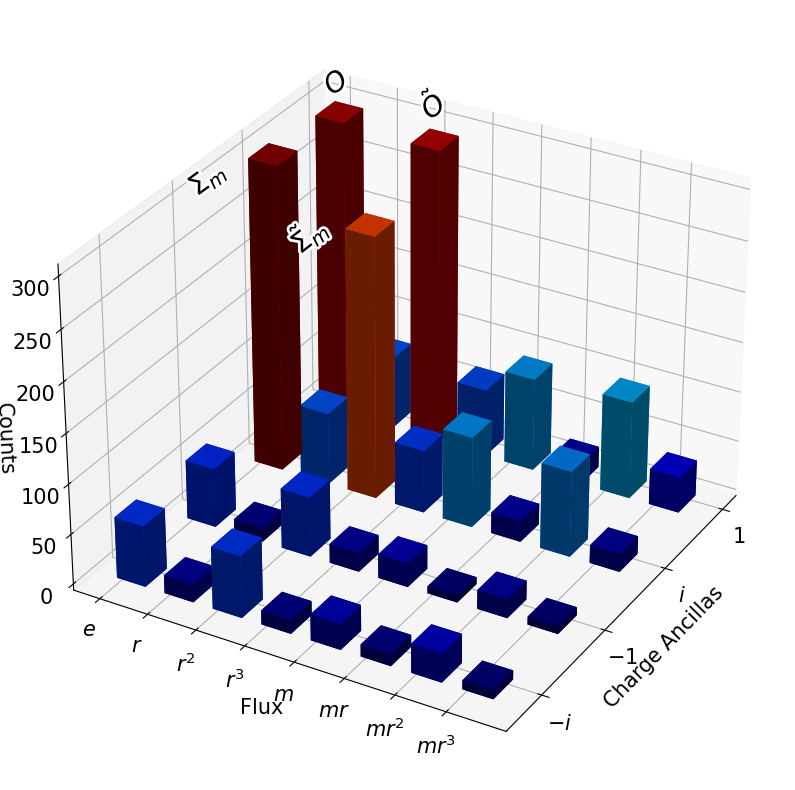

In [48]:
results = np.array(results_r)
results = results.T # for some runs, not all
print(results.sum().sum())
print(results)
results.size
results = (results).reshape([results.size])

charge_mmt_res = ['$1$','$i$','$-1$','$-i$']
charge_mmt_res_num = [0, 1, 2, 3]
g_lab_num = [0,1,2,3,4,5,6,7]
mindex_num = list(itertools.product(charge_mmt_res_num, g_lab_num))
mindex = list(itertools.product(charge_mmt_res, g_lab))
index = pd.MultiIndex.from_tuples(mindex, names=['charge ancillas', 'flux'])
df = pd.DataFrame({'Counts':results}, index= index)

x = [list(t) for t in zip(*mindex_num)][0]
y = [list(t) for t in zip(*mindex_num)][1]
x_lab = [list(t) for t in zip(*mindex)][0]
y_lab = [list(t) for t in zip(*mindex)][1]
z = results
bottom = np.zeros_like(z)
width = 0.3
depth = width*2

a = lambda i: charge_mmt_res[i]

# setup the figure and axes
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111, projection='3d')

plt.rc('font', size=15) 

cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
max_height = np.max(z)   # get range of colorbars so we can normalize
min_height = np.min(z)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in z]

ax1.bar3d(x, y, bottom, width, depth, z, color=rgba)
#surf = ax1.plot_surface(np.array(x).reshape(4,8), np.array(y).reshape(4,8), z.reshape(4,8), cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax1.set_xlabel('Charge Ancillas')
ax1.set_ylabel('Flux')
ax1.set_zlabel('Counts')

ax1.set_xticks(charge_mmt_res_num)
ax1.set_xticklabels(charge_mmt_res)
ax1.set_yticks(g_lab_num)
ax1.set_yticklabels(g_lab)

import matplotlib.patheffects as pe
ax1.text(0,-1/3,300, r'$O$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(0,2-1/3,300, r'$\tilde{O}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(2,-1/3,300, r'$\Sigma_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])
ax1.text(2,2-1/3,270, r'$\tilde{\Sigma}_{m}$', (1,0,0), size= 20,
color= 'black',
path_effects=[pe.withStroke(linewidth=4, foreground="white")])

ax1.view_init(elev=30, azim=30)
plt.savefig('basket_r.png', dpi=300)
plt.show()